# Pyroomacoustics Demo

### dependencies:  pyroomacoustics, pysoundfile, samplerate

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
import pyroomacoustics as pra
import soundfile

plt.rcParams['font.size'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

%matplotlib inline

import librosa
import librosa.display
import samplerate

import IPython.display as ipd
from IPython.display import Audio

from scipy import signal

import pyroomacoustics as pra
from pyroomacoustics.doa import circ_dist

import pandas as pd

%load_ext autoreload
%autoreload 2
from doa_lib import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read file and show it in spectogram 

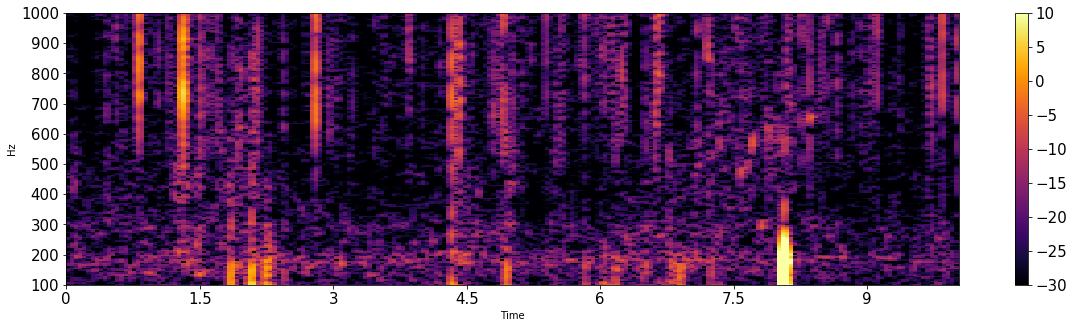

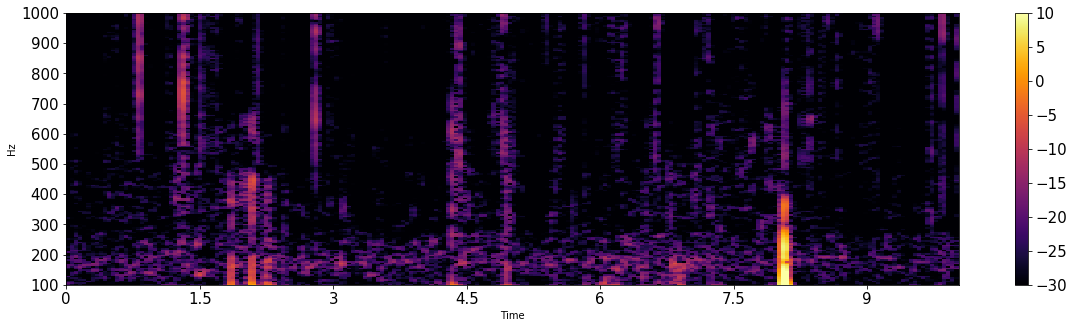

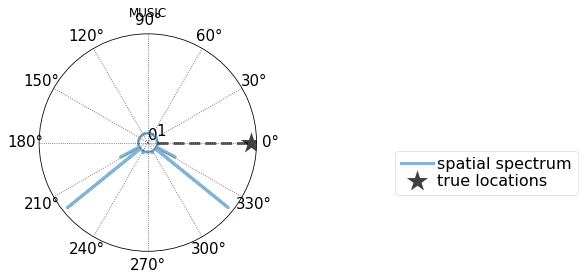

In [131]:
upper_hydrophone_file = '../rec_exp_070919/ZOOM0010_Tr2.WAV'
lower_hydrophone_file = '../rec_exp_070919/ZOOM0010_Tr1.WAV'
algo_name = 'MUSIC'
plot_sig = 1
do_doa = 1

# rec time and length
time_start = 5.5*60 + 30*60 + 34
time_length = 10

# array parameters
length = 0.4
depth = 2.5
r_rec = np.c_[
             [5000, depth-length/2., 5000],  # mic upper,
             [5000, depth+length/2., 5000]  # mic lower,
              ]

# source angle
azimuth = [0]

# fft params
nfft = 1024*8
overlap_ratio = 4

# from here: code!
time_vec = [time_start, time_start+time_length]

data_upper, fs = read_sound(upper_hydrophone_file, time=time_vec)

data_lower, fs = read_sound(lower_hydrophone_file, time=time_vec)


if hot_sig:
    spect(data_upper, fs, figsize=[20,5], overlap_ratio=overlap_ratio)
    plt.colorbar()
    plt.show()
    ipd.display(Audio(data_upper, rate=fs))
#     plt.clim(clim)

    spect(data_lower, fs, figsize=[20,5], overlap_ratio=overlap_ratio)
    plt.colorbar()
    plt.show()
    ipd.display(Audio(data_lower, rate=fs))
#     plt.clim(clim)

if do_doa:
    # normalize powers
    rec_signal_noised = [data/np.sqrt(np.sum(data**2)) for data in [data_upper, data_lower]]
#     rec_signal_noised = [data_upper, data_lower] # unnormalzied

    X = np.array([produce_spect_for_music(channel_sig, nfft=nfft, overlap_ratio=overlap_ratio, fft_type='stft')
                  for channel_sig in rec_signal_noised])

    doa = locate_source(X, r_rec, fs, nfft, algo_name, freq_range = [300., 800.])
    plot_doa(doa, azimuth, algo_name)

